###Python for data 
This is a jupyter test file

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
# rcParams['axes.edgecolor']='white'
# rcParams['xtick.color']='black'
# rcParams['ytick.color']='black'
# rcParams['axes.labelcolor']='black'
# rcParams['text.color']='black'
rcParams['figure.facecolor']=(1, 1, 1, 1)
# rcParams['figure.edgecolor']=(1, 1, 1, 1)
rcParams['font.family']='simhei'
rcParams['font.size']=13

# list=[(param, value) for param, value in plt.rcParams.items() if 'font' in param]
# list

In [4]:
# names1880=pd.read_csv('data/ch02/names/yob1880.txt',names=['name','sex','births'])
# count_by_sex=names1880.groupby('sex').births.sum()

In [5]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
    relative_path='Machine Learning/python for DA/DATA/ch02/names/yob%d.txt'  % year
    frame=pd.read_csv(relative_path,names=columns)
    frame['year']=year
    pieces.append(frame)

names=pd.concat(pieces,ignore_index=True)

In [6]:
def plt_year_sex():
    year_sex=names.pivot_table(values='births',columns=['sex'],index=['year'],aggfunc=np.sum)
    year_sex.plot(title='Year-Sex')
    plt.show()

In [7]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()  #births.sum()是对按year,sex分组后的小组内求和
    return group

In [8]:
names=names.groupby(['year','sex']).apply(add_prop) #得到1880年name1 Female人数占 1880年 Female总人数的比例
check=np.allclose(names.groupby(['year','sex']).prop.sum(),1)
check

True

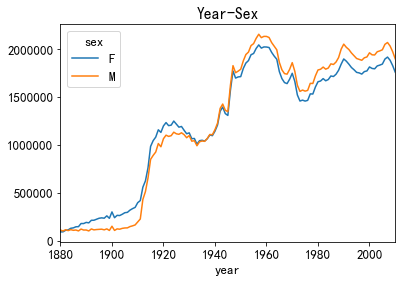

In [9]:
plt_year_sex()

In [10]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]  

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)      #分组后每个小组内排序并取前1000

###分析命名趋势

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


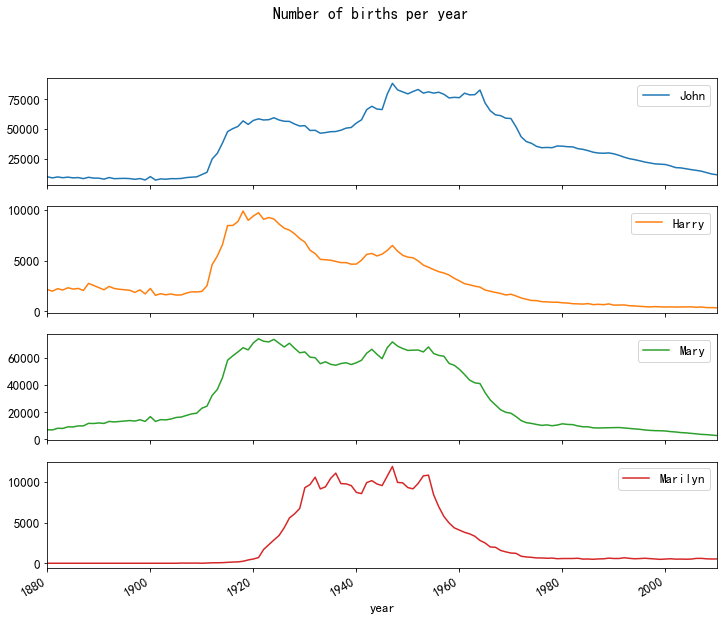

In [11]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

total_births=pd.pivot_table(top1000,values='births',index='year',columns='name',aggfunc=sum)
subset=total_births[['John','Harry','Mary','Marilyn']].fillna(0.0)
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')
plt.show()

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


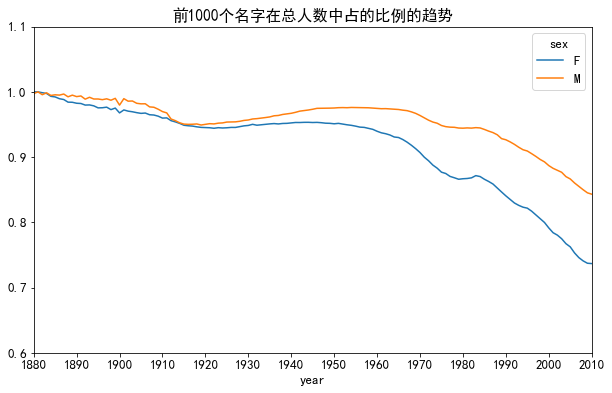

In [12]:
table=top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='前1000个名字在总人数中占的比例的趋势',yticks=np.linspace(0.6,1.1,6),
           xticks=range(1880,2020,10),figsize=(10,6))

In [13]:
df=boys[boys.year==2010]
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
# prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)[0]

116

In [14]:
df2=boys[boys.year==1900]
prop_cumsum=df2.sort_values(by='prop',ascending=False).prop.cumsum()
# prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)[0]      #返回以为ndarray数据类型

24

In [15]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1

###searchsorted
返回一个ndarray对象；<br>
需取零否则报错，不取[0]返回的dataframe对象的每一个value为一个ndarray对象，取[0]→得到具体的值

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


[1880, 2020, 0, 250]

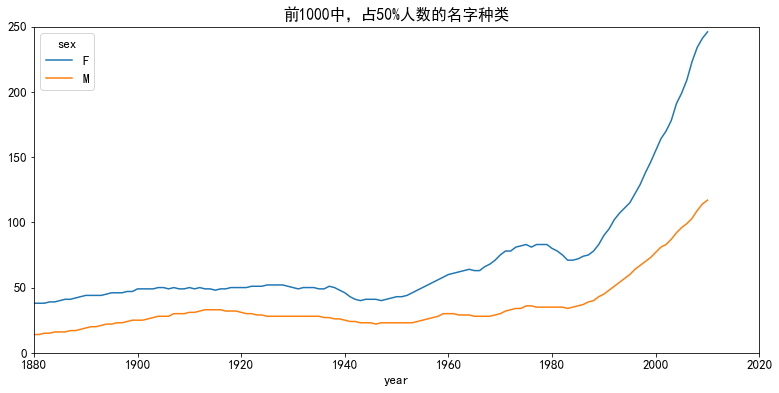

In [16]:
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.plot(title='前1000中，占50%人数的名字种类',figsize=(13,6))
plt.axis([1880,2020,0,250])

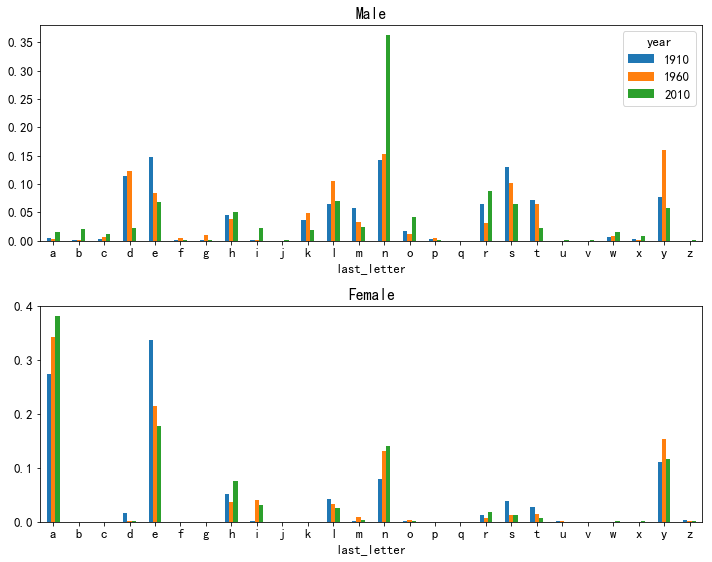

In [17]:
get_last_letter=lambda x:x[-1]
last_letters=names.name.map(get_last_letter)
names['last_letter']=last_letters
last_letter_table=names.pivot_table(values='births',index='last_letter',
                                    columns=['sex','year'],aggfunc=sum)
subtable=last_letter_table.reindex(columns=[1910,1960,2010],level='year').fillna(0)
letter_prop=subtable / subtable.sum().astype(float)
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)
fig.tight_layout()
# plt.subplots_adjust(hspace=0.2)

###subtable.sum和subtable.sum()区别<br>
前者返回一个method对象，后者调用方法，返回一个Series

###调整subplots子区域之间的间距<br>
####1.fig.tight_layout()<br>
####2.subplots_adjust
```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)<br>
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
```

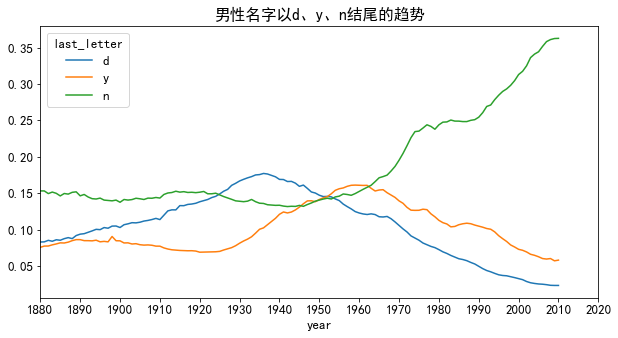

In [18]:
last_letter_prop=last_letter_table/last_letter_table.sum().astype(float)
dny_ts=last_letter_prop.loc[['d','y','n'],'M'].T
dny_ts.plot(figsize=(10,5),title='男性名字以d、y、n结尾的趋势',xticks=range(1880,2021,10))
# plt.axis([1880,2020,0,0.4])

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


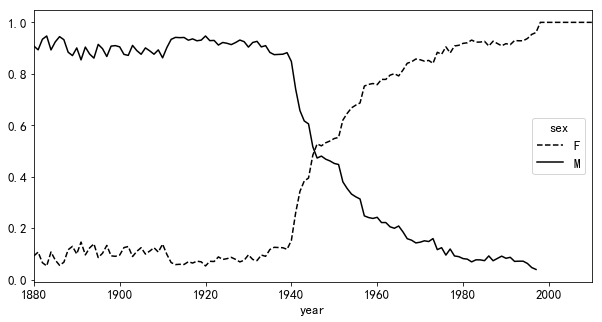

In [62]:
all_names=top1000.name.unique()
mask=np.array(['lesl' in x.lower() for x in all_names])
lesley_like=all_names[mask]

filtered=top1000[top1000.name.isin(lesley_like)]

lesley_table=filtered.pivot_table(values='births',index='year',columns='sex',aggfunc=sum)
lesley_table=lesley_table.div(lesley_table.sum(1),axis=0)
lesley_table.plot(style={'M':'k-','F':'k--'},figsize=(10,5))